In [2]:
pip install pydicom

  Using cached pydicom-2.2.2-py3-none-any.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-5.0.2-py2.py3-none-any.whl (6.7 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
from pathlib import Path # For convenient path handling
import pydicom # To read dicom files
import numpy as np # To store the preprocessed images
import cv2 # To re-size the images
import pandas as pd # To read the provided labels csv
import matplotlib.pyplot as plt # To visualize the images
from tqdm.notebook import tqdm # To get the progress bar

In [2]:
# Instructions from https://github.com/Kaggle/kaggle-api

In [2]:
import kaggle

In [4]:
!cd C:/Users/chris/.kaggle

In [ ]:
#!kaggle datasets list

In [14]:
!kaggle competitions download -c rsna-pneumonia-detection-challenge


  0%|          | 0.00/3.66G [00:00<?, ?B/s]
  0%|          | 1.00M/3.66G [00:00<10:45, 6.09MB/s]
  0%|          | 2.00M/3.66G [00:00<10:16, 6.37MB/s]
  0%|          | 3.00M/3.66G [00:00<09:59, 6.56MB/s]
  0%|          | 4.00M/3.66G [00:00<09:54, 6.60MB/s]
  0%|          | 5.00M/3.66G [00:00<09:49, 6.66MB/s]
  0%|          | 6.00M/3.66G [00:00<09:50, 6.65MB/s]
  0%|          | 7.00M/3.66G [00:01<09:45, 6.70MB/s]
  0%|          | 8.00M/3.66G [00:01<09:46, 6.69MB/s]
  0%|          | 9.00M/3.66G [00:01<09:46, 6.69MB/s]
  0%|          | 10.0M/3.66G [00:01<09:44, 6.71MB/s]
  0%|          | 11.0M/3.66G [00:01<09:43, 6.73MB/s]
  0%|          | 12.0M/3.66G [00:01<09:45, 6.70MB/s]
  0%|          | 13.0M/3.66G [00:02<09:42, 6.73MB/s]
  0%|          | 14.0M/3.66G [00:02<09:43, 6.72MB/s]
  0%|          | 15.0M/3.66G [00:02<09:41, 6.73MB/s]
  0%|          | 16.0M/3.66G [00:02<09:43, 6.72MB/s]
  0%|          | 17.0M/3.66G [00:02<09:43, 6.71MB/s]
  0%|          | 18.0M/3.66G [00:02<09:42, 6.72MB/s]
 

  6%|6         | 226M/3.66G [00:44<14:52, 4.14MB/s]
  6%|6         | 227M/3.66G [00:45<36:09, 1.70MB/s]
  6%|6         | 228M/3.66G [00:45<28:05, 2.19MB/s]
  6%|6         | 229M/3.66G [00:45<22:24, 2.75MB/s]
  6%|6         | 230M/3.66G [00:46<18:25, 3.34MB/s]
  6%|6         | 231M/3.66G [00:46<15:37, 3.94MB/s]
  6%|6         | 232M/3.66G [00:46<13:40, 4.50MB/s]
  6%|6         | 233M/3.66G [00:46<12:19, 4.99MB/s]
  6%|6         | 234M/3.66G [00:46<11:21, 5.41MB/s]
  6%|6         | 235M/3.66G [00:47<21:02, 2.92MB/s]
  6%|6         | 236M/3.66G [00:47<17:27, 3.52MB/s]
  6%|6         | 237M/3.66G [00:47<14:57, 4.10MB/s]
  6%|6         | 238M/3.66G [00:48<16:07, 3.81MB/s]
  6%|6         | 239M/3.66G [00:48<14:00, 4.38MB/s]
  6%|6         | 240M/3.66G [00:48<12:33, 4.88MB/s]
  6%|6         | 241M/3.66G [00:48<13:56, 4.40MB/s]
  6%|6         | 242M/3.66G [00:48<12:29, 4.91MB/s]
  6%|6         | 243M/3.66G [00:49<12:48, 4.78MB/s]
  7%|6         | 244M/3.66G [00:49<11:42, 5.24MB/s]
  7%|6      

 11%|#1        | 430M/3.66G [01:33<09:44, 5.96MB/s]
 11%|#1        | 431M/3.66G [01:33<09:25, 6.16MB/s]
 12%|#1        | 432M/3.66G [01:34<09:10, 6.32MB/s]
 12%|#1        | 433M/3.66G [01:34<09:02, 6.42MB/s]
 12%|#1        | 434M/3.66G [01:34<08:53, 6.52MB/s]
 12%|#1        | 435M/3.66G [01:34<08:49, 6.56MB/s]
 12%|#1        | 436M/3.66G [01:34<08:44, 6.62MB/s]
 12%|#1        | 437M/3.66G [01:34<08:42, 6.65MB/s]
 12%|#1        | 438M/3.66G [01:35<08:39, 6.68MB/s]
 12%|#1        | 439M/3.66G [01:35<08:37, 6.71MB/s]
 12%|#1        | 440M/3.66G [01:35<08:39, 6.69MB/s]
 12%|#1        | 441M/3.66G [01:35<08:36, 6.72MB/s]
 12%|#1        | 442M/3.66G [01:35<08:37, 6.70MB/s]
 12%|#1        | 443M/3.66G [01:35<08:35, 6.72MB/s]
 12%|#1        | 444M/3.66G [01:35<08:35, 6.72MB/s]
 12%|#1        | 445M/3.66G [01:36<08:36, 6.71MB/s]
 12%|#1        | 446M/3.66G [01:36<08:39, 6.67MB/s]
 12%|#1        | 447M/3.66G [01:36<08:36, 6.70MB/s]
 12%|#1        | 448M/3.66G [01:36<08:35, 6.72MB/s]
 12%|#1     

 86%|########6 | 3.16G/3.66G [09:48<01:36, 5.54MB/s]
 86%|########6 | 3.17G/3.66G [09:48<01:34, 5.64MB/s]
 86%|########6 | 3.17G/3.66G [09:49<01:33, 5.72MB/s]
 86%|########6 | 3.17G/3.66G [09:49<01:30, 5.87MB/s]
 87%|########6 | 3.17G/3.66G [09:49<01:30, 5.88MB/s]
 87%|########6 | 3.17G/3.66G [09:49<01:29, 5.89MB/s]
 87%|########6 | 3.17G/3.66G [09:50<01:58, 4.46MB/s]
 87%|########6 | 3.17G/3.66G [09:50<01:47, 4.93MB/s]
 87%|########6 | 3.17G/3.66G [09:50<01:38, 5.35MB/s]
 87%|########6 | 3.17G/3.66G [09:50<01:32, 5.68MB/s]
 87%|########6 | 3.17G/3.66G [09:50<01:27, 5.97MB/s]
 87%|########6 | 3.17G/3.66G [09:50<01:37, 5.36MB/s]
 87%|########6 | 3.18G/3.66G [09:51<01:31, 5.69MB/s]
 87%|########6 | 3.18G/3.66G [09:51<01:27, 5.97MB/s]
 87%|########6 | 3.18G/3.66G [09:51<01:24, 6.17MB/s]
 87%|########6 | 3.18G/3.66G [09:51<01:21, 6.35MB/s]
 87%|########6 | 3.18G/3.66G [09:51<01:20, 6.44MB/s]
 87%|########6 | 3.18G/3.66G [09:51<01:19, 6.52MB/s]
 87%|########6 | 3.18G/3.66G [09:52<01:18, 6.5

In [3]:
!cd C:\Users\chris\Desktop\Computer Science\Udemy Courses\Deep Learning with PyTorch for Medical Image Analysis\AI-IN-MEDICAL-MATERIALS\04-Pneumonia-Classification

In [4]:
pwd

'C:\\Users\\chris\\Desktop\\Computer Science\\Udemy Courses\\Deep Learning with PyTorch for Medical Image Analysis\\AI-IN-MEDICAL-MATERIALS\\04-Pneumonia-Classification'

In [5]:
labels = pd.read_csv("stage_2_train_labels.csv")

In [6]:
labels.head(6)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1


In [7]:
# Remove duplicate entries
labels = labels.drop_duplicates("patientId")

In [8]:
labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [9]:
ROOT_PATH = Path("stage_2_train_images/")
SAVE_PATH = Path("Processed/")

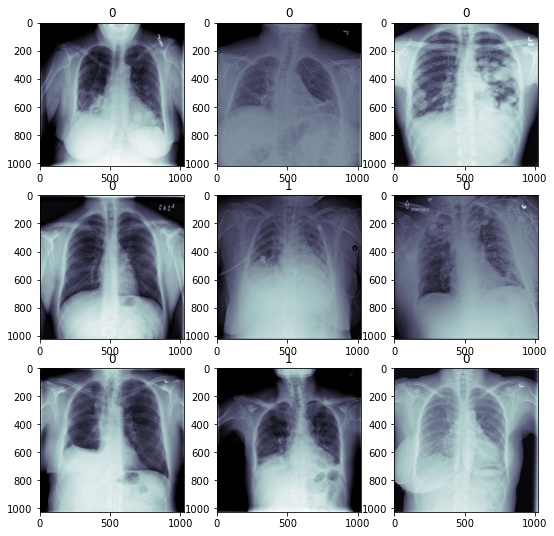

In [10]:
# Plot 9 Images and their class labels

fig, axis = plt.subplots(3, 3, figsize=(9, 9))
c = 0
for i in range(3):
    for j in range(3):
        patient_id = labels.patientId.iloc[c]
        dcm_path = ROOT_PATH/patient_id
        dcm_path = dcm_path.with_suffix(".dcm")
        dcm = pydicom.read_file(dcm_path).pixel_array
        
        label = labels["Target"].iloc[c]
        
        axis[i][j].imshow(dcm, cmap="bone")
        axis[i][j].set_title(label)
        c+=1

In [32]:
# 0: All X-Rays which do not show signs of pneumonia
# 1: All X-Rays which show signs of pneumonia

In [33]:
# Normalize data, create new folders for test and train and save the preprocessed images into the split folders


sums = 0
sums_squared = 0

for c, patient_id in enumerate(tqdm(labels.patientId)):
    dcm_path = ROOT_PATH/patient_id  # Create the path to the dcm file
    dcm_path = dcm_path.with_suffix(".dcm")  # And add the .dcm suffix
    
    # Read the dicom file with pydicom and standardize the array
    dcm = pydicom.read_file(dcm_path).pixel_array / 255  
        
    # Resize the image as 1024x1024 is way to large to be handeled by Deep Learning models at the moment
    # Let's use a shape of 224x224
    # In order to use less space when storing the image we convert it to float16
    dcm_array = cv2.resize(dcm, (224, 224)).astype(np.float16)
    
    # Retrieve the corresponding label
    label = labels.Target.iloc[c]
    
    # 4/5 train split, 1/5 val split
    train_or_val = "train" if c < 24000 else "val" 
        
    current_save_path = SAVE_PATH/train_or_val/str(label) # Define save path and create if necessary
    current_save_path.mkdir(parents=True, exist_ok=True)
    np.save(current_save_path/patient_id, dcm_array)  # Save the array in the corresponding directory
    
    normalizer = dcm_array.shape[0] * dcm_array.shape[1]  # Normalize sum of image
    if train_or_val == "train":  # Only use train data to compute dataset statistics
        sums += np.sum(dcm_array) / normalizer
        sums_squared += (np.power(dcm_array, 2).sum()) / normalizer


  0%|          | 0/26684 [00:00<?, ?it/s]

In [34]:
mean = sums / 24000
std = np.sqrt(sums_squared / 24000 - (mean**2))

In [35]:
print(f"Mean of Dataset: {mean}, STD: {std}")

Mean of Dataset: 0.4903962485384803, STD: 0.24795070634161256


In [36]:
# Lecture 2 - Train Data

In [39]:
#pip install torchmetrics

In [26]:
pip install pytorch_lightning==1.4.9

  Using cached pytorch_lightning-1.4.9-py3-none-any.whl (925 kB)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: urllib3<1.27,>=1.21.1 in c:\users\chris\anaconda3\lib\site-packages (from requests->fsspec[http]!=2021.06.0,>=2021.05.0->pytorch_lightning==1.4.9) (1.26.4)

  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 1.5.2
    Uninstalling pytorch-lightning-1.5.2:
      Successfully uninstalled pytorch-lightning-1.5.2


In [11]:
import torch
import torchvision
from torchvision import transforms
import torchmetrics
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def load_file(path):
    return np.load(path).astype(np.float32)

In [13]:
train_transforms = transforms.Compose([
                                    transforms.ToTensor(),  # Convert numpy array to tensor
                                    transforms.Normalize(0.49, 0.248),  # Use mean and std from preprocessing notebook
                                    transforms.RandomAffine( # Data Augmentation
                                        degrees=(-5, 5), #random rotation between -5 and 5 degrees
                                        translate=(0, 0.05), # Creates random translations(?) of a max of 5%
                                        scale=(0.9, 1.1)), # Randomly scales the images between 0.9 to 1.1 X magnification
                                        transforms.RandomResizedCrop((224, 224), # Crops random portion of image & resizes image to desired size
                                        # In the case of above we don't want our image size to change so we've left it as 224 x 224
                                        scale=(0.35, 1)) # This defines the sizes our crops are allowed to have
                                        # The above says randomly crop images to between 35% and 100% of their original size

])

val_transforms = transforms.Compose([
                                    transforms.ToTensor(),  # Convert numpy array to tensor
                                    transforms.Normalize([0.49], [0.248]),  # Use mean and std from preprocessing notebook
])


In [14]:
train_dataset = torchvision.datasets.DatasetFolder(
    "Processed/train/",
    loader=load_file, extensions="npy", transform=train_transforms)

val_dataset = torchvision.datasets.DatasetFolder(
    "Processed/val/",
    loader=load_file, extensions="npy", transform=val_transforms)

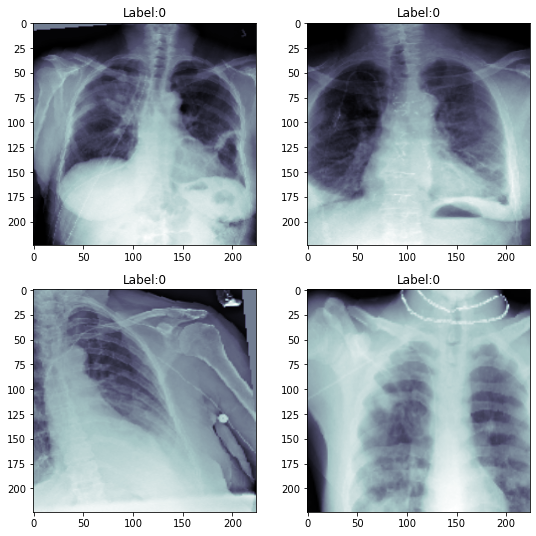

In [15]:
fig, axis = plt.subplots(2, 2, figsize=(9, 9))
for i in range(2):
    for j in range(2):
        random_index = np.random.randint(0, 20000)
        x_ray, label = train_dataset[random_index]
        axis[i][j].imshow(x_ray[0], cmap="bone")
        axis[i][j].set_title(f"Label:{label}")

In [16]:
batch_size = 64#TODO
num_workers = 8# TODO

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=False)

print(f"There are {len(train_dataset)} train images and {len(val_dataset)} val images")

There are 24000 train images and 2684 val images


In [17]:
np.unique(train_dataset.targets, return_counts=True)

(array([0, 1]), array([18593,  5407], dtype=int64))

In [18]:
np.unique(val_dataset.targets, return_counts=True)

(array([0, 1]), array([2079,  605], dtype=int64))

In [19]:
# If you have imbalanced classes you can either do nothing, or you can assign a weighted loss function
# like in the other medical imaging course I did
# or you can use oversampling - where you show the network as many samples from class 1 as from class 0

In [20]:
torchvision.models.resnet18()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [21]:
class PneumoniaModel(pl.LightningModule):
    def __init__(self, weight=1):
        super().__init__()
        
        self.model = torchvision.models.resnet18()
        # change conv1 from 3 to 1 input channels
        self.model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        # change out_feature of the last fully connected layer (called fc in resnet18) from 1000 to 1
        self.model.fc = torch.nn.Linear(in_features=512, out_features=1)
        
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-4)
        self.loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([weight]))
        
        # simple accuracy computation
        self.train_acc = torchmetrics.Accuracy()
        self.val_acc = torchmetrics.Accuracy()

    def forward(self, data):
        pred = self.model(data)
        return pred
    
    def training_step(self, batch, batch_idx):
        x_ray, label = batch
        label = label.float()  # Convert label to float (just needed for loss computation)
        pred = self(x_ray)[:,0]  # Prediction: Make sure prediction and label have same shape
        loss = self.loss_fn(pred, label)  # Compute the loss
        
        # Log loss and batch accuracy
        self.log("Train Loss", loss)
        self.log("Step Train Acc", self.train_acc(torch.sigmoid(pred), label.int()))
        return loss
    
    
    def training_epoch_end(self, outs):
        # After one epoch compute the whole train_data accuracy
        self.log("Train Acc", self.train_acc.compute())
        
        
    def validation_step(self, batch, batch_idx):
        # Same steps as in the training_step
        x_ray, label = batch
        label = label.float()
        pred = self(x_ray)[:,0]  # make sure prediction and label have same shape

        loss = self.loss_fn(pred, label)
        
        # Log validation metrics
        self.log("Val Loss", loss)
        self.log("Step Val Acc", self.val_acc(torch.sigmoid(pred), label.int()))
        return loss
    
    def validation_epoch_end(self, outs):
        self.log("Val Acc", self.val_acc.compute())
    
    def configure_optimizers(self):
        #Caution! You always need to return a list here (just pack your optimizer into one :))
        return [self.optimizer]

In [22]:
model = PneumoniaModel()  # Instantiate the model

In [23]:
# Create the checkpoint callback
checkpoint_callback = ModelCheckpoint(
    monitor='Val Acc',
    save_top_k=10,
    mode='max')

# This will store the 10 best models based on validation accuracy

In [24]:
pip list

Package                            Version
---------------------------------- ---------------------
absl-py                            1.0.0
aiohttp                            3.8.1
aiosignal                          1.2.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
async-timeout                      4.0.1
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2

In [24]:
# Create the trainer
# Change the gpus parameter to the number of available gpus on your system. Use 0 for CPU training

gpus = 1 #TODO
trainer = pl.Trainer(gpus=gpus, logger=TensorBoardLogger(save_dir="./logs"), log_every_n_steps=1,
                     callbacks=checkpoint_callback,
                     max_epochs=35)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [25]:
# +model.train_ds.num_workers=16 \
# +model.train_ds.pin_memory=True \
# +model.validation_ds.num_workers=16 \
# +model.validation_ds.pin_memory=True \

In [ ]:
trainer.fit(model, train_loader, val_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params
------------------------------------------------
0 | model     | ResNet            | 11.2 M
1 | loss_fn   | BCEWithLogitsLoss | 0     
2 | train_acc | Accuracy          | 0     
3 | val_acc   | Accuracy          | 0     
------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.683    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Use strict=False, otherwise we would want to match the pos_weight which is not necessary
model = PneumoniaModel.load_from_checkpoint("weights/weights_1.ckpt")
model.eval()
model.to(device);